In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [ ]:
tokenizer = Tokenizer()
data = open('/content/drive/MyDrive/Hindi Training Data.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'है': 1, 'हैं': 2, 'में': 3, 'से': 4, 'की': 5, 'के': 6, 'का': 7, 'भी': 8, 'तो': 9, 'ये': 10, 'हो': 11, 'पर': 12, 'हम': 13, 'नहीं': 14, 'क्या': 15, 'मैं': 16, 'था': 17, 'को': 18, 'अब': 19, 'थे': 20, 'कर': 21, 'मेरे': 22, 'एक': 23, 'दुनिया': 24, 'न': 25, 'कोई': 26, 'रहा': 27, 'जो': 28, 'कुछ': 29, 'तेरे': 30, 'पे': 31, 'ने': 32, 'और': 33, 'सब': 34, 'ही': 35, 'हूँ': 36, 'घर': 37, 'मुझे': 38, 'वह': 39, 'गए': 40, 'होने': 41, 'किसी': 42, 'सूरज': 43, 'मेरा': 44, 'मेरी': 45, 'कि': 46, 'शहर': 47, 'वो': 48, 'इक': 49, 'धूप': 50, 'दी': 51, 'किस': 52, 'मगर': 53, 'दिन': 54, 'बहुत': 55, 'अपने': 56, 'करो': 57, 'करने': 58, 'इस': 59, 'जा': 60, 'वाला': 61, 'भर': 62, 'थी': 63, 'यही': 64, 'रहता': 65, 'रहे': 66, 'कौन': 67, 'रक्खा': 68, 'रहती': 69, 'जाने': 70, 'तुम': 71, 'हर': 72, 'जाए': 73, 'रात': 74, 'यहाँ': 75, 'वही': 76, 'फिर': 77, 'साथ': 78, 'सर': 79, 'चल': 80, 'मौसम': 81, 'ज़िंदगी': 82, 'चाहिए': 83, 'ले': 84, 'गई': 85, 'चुका': 86, 'होती': 87, 'आँखों': 88, 'आता': 89, 'जाते': 90, 'नाम': 91, 'तक': 92, 'पू

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['दुनिया'])

24


In [ ]:
print(xs[1000])

[  0   0   0 122 122   9  22  12 127 134]


In [ ]:
print(tokenizer.word_index)

{'है': 1, 'हैं': 2, 'में': 3, 'से': 4, 'की': 5, 'के': 6, 'का': 7, 'भी': 8, 'तो': 9, 'ये': 10, 'हो': 11, 'पर': 12, 'हम': 13, 'नहीं': 14, 'क्या': 15, 'मैं': 16, 'था': 17, 'को': 18, 'अब': 19, 'थे': 20, 'कर': 21, 'मेरे': 22, 'एक': 23, 'दुनिया': 24, 'न': 25, 'कोई': 26, 'रहा': 27, 'जो': 28, 'कुछ': 29, 'तेरे': 30, 'पे': 31, 'ने': 32, 'और': 33, 'सब': 34, 'ही': 35, 'हूँ': 36, 'घर': 37, 'मुझे': 38, 'वह': 39, 'गए': 40, 'होने': 41, 'किसी': 42, 'सूरज': 43, 'मेरा': 44, 'मेरी': 45, 'कि': 46, 'शहर': 47, 'वो': 48, 'इक': 49, 'धूप': 50, 'दी': 51, 'किस': 52, 'मगर': 53, 'दिन': 54, 'बहुत': 55, 'अपने': 56, 'करो': 57, 'करने': 58, 'इस': 59, 'जा': 60, 'वाला': 61, 'भर': 62, 'थी': 63, 'यही': 64, 'रहता': 65, 'रहे': 66, 'कौन': 67, 'रक्खा': 68, 'रहती': 69, 'जाने': 70, 'तुम': 71, 'हर': 72, 'जाए': 73, 'रात': 74, 'यहाँ': 75, 'वही': 76, 'फिर': 77, 'साथ': 78, 'सर': 79, 'चल': 80, 'मौसम': 81, 'ज़िंदगी': 82, 'चाहिए': 83, 'ले': 84, 'गई': 85, 'चुका': 86, 'होती': 87, 'आँखों': 88, 'आता': 89, 'जाते': 90, 'नाम': 91, 'तक': 92, 'पू

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 1000, input_length=max_sequence_len-1))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 1000)          2375000   
                                                                 
 dropout_6 (Dropout)         (None, 10, 1000)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 512)              2574336   
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 2375)              1218375   
                                                                 
Total params: 6,167,711
Trainable params: 6,167,711
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
457/457 [==============================] - 7s 8ms/step - loss: 5.8823 - accuracy: 0.1490
Epoch 2/50
457/457 [==============================] - 4s 8ms/step - loss: 4.0139 - accuracy: 0.3379
Epoch 3/50
457/457 [==============================] - 4s 8ms/step - loss: 3.2144 - accuracy: 0.4360
Epoch 4/50
457/457 [==============================] - 4s 8ms/step - loss: 2.4680 - accuracy: 0.5280
Epoch 5/50
457/457 [==============================] - 4s 8ms/step - loss: 1.9258 - accuracy: 0.6206
Epoch 6/50
457/457 [==============================] - 4s 8ms/step - loss: 1.7556 - accuracy: 0.6535
Epoch 7/50
457/457 [==============================] - 4s 8ms/step - loss: 1.6054 - accuracy: 0.6839
Epoch 8/50
457/457 [==============================] - 4s 8ms/step - loss: 1.5134 - accuracy: 0.7024
Epoch 9/50
457/457 [==============================] - 4s 8ms/step - loss: 1.5887 - accuracy: 0.6925
Epoch 10/50
457/457 [==============================] - 4s 8ms/step - loss: 1.6735 - accuracy: 0.6807

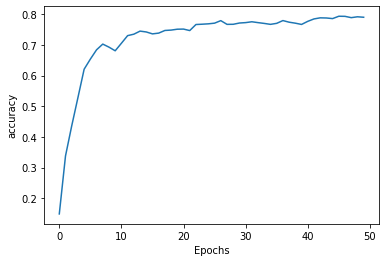

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "मोहब्बत"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
मोहब्बत में ज़रूरी हैं वफ़ाएँ क्या जौहर खुलते हैं दिल होकर होगी हमारी मेजबानी और हैं बदले देते हैं दावेदार मेरे
